In [15]:
import matplotlib.pyplot as plt
# from tensorflow import keras
from keras.models import Sequential
from keras.layers import Input, Conv1D, BatchNormalization, MaxPooling1D, Dropout, Dense, Flatten, Reshape
# from keras import backend as K
from loader import create_dataset, denormalize_3d

import tensorflow as tf


In [16]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))


In [17]:
X_train, X_test, y_train, y_test = create_dataset(input_hours=6, output_hours=1)

In [18]:
# Build the LSTM model,
# Building the LSTM model with two LSTM layers and two Dense layers.

# Initializes a linear stack of layers in the model. In a Sequential model, each layer has exact one input tensor and one output tensor.
model = Sequential()

model.add(
  Input(shape=(360, 41))
)

model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Flatten())
model.add(Dense(60 * 41, activation='relu'))
model.add(Reshape((60, 41)))
model.add(Dense(41))

# Compile the model,
# Compile the model using Adam optimizer and mean squared error as the loss function.
learn_rate = 0.001
# optimizer = tf.keras.optimizers.Adam(learning_rate=learn_rate)
optimizer = tf.keras.optimizers.Lion(learning_rate=learn_rate)
# optimizer = tf.keras.optimizers.Adafactor(learning_rate=learn_rate)

model.compile(
    optimizer=optimizer,
    loss="mean_squared_error",
    metrics=["mean_absolute_error", "mean_squared_error", rmse],
)


# Train the model
num_epochs = 10
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=num_epochs,
    batch_size=64,
    verbose=1,
)

# Predicting and inverse transformation to original prices
# Predicting and transforming predictions back to original scale.
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = denormalize_3d(train_predict)
test_predict = denormalize_3d(test_predict)

Epoch 1/10


2024-12-14 00:39:40.551541: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_795', 160 bytes spill stores, 160 bytes spill loads

2024-12-14 00:39:40.879191: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 32 bytes spill stores, 32 bytes spill loads

2024-12-14 00:39:41.054320: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 84 bytes spill stores, 84 bytes spill loads

2024-12-14 00:39:42.935644: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_13', 60 bytes spill stores, 60 bytes spill loads

2024-12-14 00:39:44.999752: I external/local_xla/xla/stream_executor/cu

156/157 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1214 - mean_absolute_error: 0.2542 - mean_squared_error: 0.1214 - rmse: 0.3371

2024-12-14 00:39:52.024107: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_795', 20 bytes spill stores, 20 bytes spill loads

2024-12-14 00:39:52.784943: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_795', 208 bytes spill stores, 208 bytes spill loads

2024-12-14 00:39:54.342837: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1190', 128 bytes spill stores, 128 bytes spill loads

2024-12-14 00:39:54.669353: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1190', 120 bytes spill stores, 120 bytes spill loads

2024-12-14 00:39:55.309914: I external/local_xla/xla/str

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.1212 - mean_absolute_error: 0.2538 - mean_squared_error: 0.1212 - rmse: 0.3366

2024-12-14 00:40:04.024286: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_76', 24 bytes spill stores, 24 bytes spill loads



157/157 ━━━━━━━━━━━━━━━━━━━━ 28s 107ms/step - loss: 0.1209 - mean_absolute_error: 0.2535 - mean_squared_error: 0.1209 - rmse: 0.3362 - val_loss: 0.0638 - val_mean_absolute_error: 0.1827 - val_mean_squared_error: 0.0638 - val_rmse: 0.2518
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0305 - mean_absolute_error: 0.1246 - mean_squared_error: 0.0305 - rmse: 0.1743 - val_loss: 0.0515 - val_mean_absolute_error: 0.1536 - val_mean_squared_error: 0.0515 - val_rmse: 0.2261
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0210 - mean_absolute_error: 0.0976 - mean_squared_error: 0.0210 - rmse: 0.1446 - val_loss: 0.0247 - val_mean_absolute_error: 0.1068 - val_mean_squared_error: 0.0247 - val_rmse: 0.1564
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0162 - mean_absolute_error: 0.0824 - mean_squared_error: 0.0162 - rmse: 0.1270 - val_loss: 0.0177 - val_mean_absolute_error: 0.0893 - val_mean_squared_error: 0.0177 - val_rmse: 0.1327
Epoch 5/10
157/157 ━━━━━

2024-12-14 00:40:15.998842: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_62', 160 bytes spill stores, 160 bytes spill loads



288/314 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

2024-12-14 00:40:19.214443: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_62', 4 bytes spill stores, 4 bytes spill loads



314/314 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


In [19]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)               │ (None, 358, 64)        │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 89, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 89, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 89, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 89, 128)        │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 89, 64)         │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 5696)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2460)           │    14,014,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_2 (Reshape)             │ (None, 60, 41)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 60, 41)         │         1,722 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,082,094 (107.12 MB)

 Trainable params: 14,040,982 (53.56 MB)

 Non-trainable params: 128 (512.00 B)

 Optimizer params: 14,040,984 (53.56 MB)

In [20]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'mean_squared_error', 'rmse', 'val_loss', 'val_mean_absolute_error', 'val_mean_squared_error', 'val_rmse'])

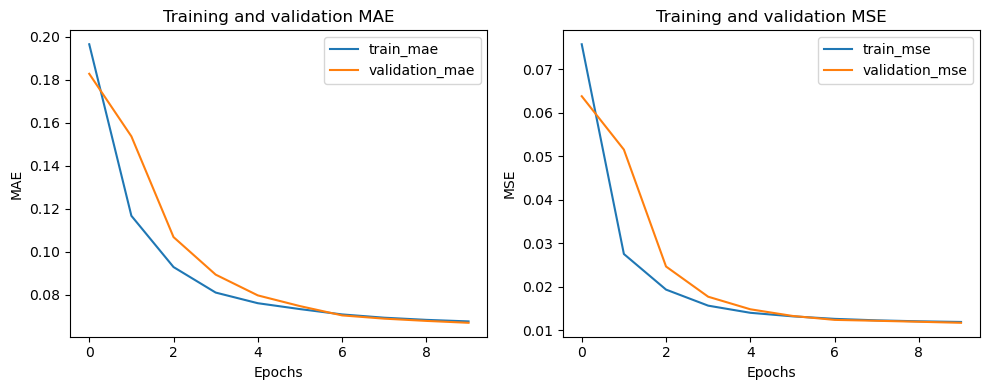

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot training & validation MAE values
ax1.plot(
    range(num_epochs), history.history["mean_absolute_error"], label="train_mae"
)
ax1.plot(
    range(num_epochs),
    history.history["val_mean_absolute_error"],
    label="validation_mae",
)
ax1.set_title("Training and validation MAE")
ax1.set_ylabel("MAE")
ax1.set_xlabel("Epochs")
ax1.legend()

# Plot training & validation MSE values
ax2.plot(
    range(num_epochs), history.history["mean_squared_error"], label="train_mse"
)
ax2.plot(
    range(num_epochs),
    history.history["val_mean_squared_error"],
    label="validation_mse",
)
ax2.set_title("Training and validation MSE")
ax2.set_ylabel("MSE")
ax2.set_xlabel("Epochs")
ax2.legend()

fig.tight_layout()
plt.show()

In [22]:
fig.savefig(f"numEpochs_{num_epochs}-learningRate_{learn_rate}.png")